In [1]:
import numpy as np
import pandas as pd

import data

In [2]:
# PREPROCESSING -- implemented this block from the regression file

# merge all food dataframes into one
full_food = pd.concat([pd.DataFrame(x) for x in data.food.values()], axis=1)
full_food = full_food.loc[:,~full_food.columns.duplicated()]

# For now just don't include the education data at all.
full_df = full_food

# combine food and education dataframes, removing state and county from education
# education = pd.DataFrame(data.education).drop(['State', 'Area name'], axis=1)
# full_df = full_food.merge(education, left_index=True, right_index=True)

# normalize any column that isn't already boolean
bool_cols = [col for col in full_df 
                    if np.isin(full_df[col].dropna().unique(), [0, 1]).all()]
for col in full_df.columns:
    if (col in bool_cols) or (col in ['State', 'County']):
        continue
    full_df[col] = (full_df[col]-full_df[col].min())/(full_df[col].max()-full_df[col].min())

full_df = full_df.drop('County', axis=1)

# one-hot encoding for state
one_hot = pd.get_dummies(full_df['State'])
full_df = full_df.drop('State', axis=1)
full_df = full_df.join(one_hot)

# aggressively just drop any column that has any NaN values in it
full_df = full_df.dropna(axis=1)

print(full_df.shape)

(3140, 165)


In [3]:
#checking the columns for values with low variance
full_df.var()

LACCESS_POP10            0.003356
PCT_LACCESS_POP10        0.040962
LACCESS_LOWI10           0.002248
PCT_LACCESS_LOWI10       0.012801
LACCESS_HHNV10           0.004715
PCT_LACCESS_HHNV10       0.002404
LACCESS_CHILD10          0.002562
PCT_LACCESS_CHILD10      0.020410
LACCESS_SENIORS10        0.006844
PCT_LACCESS_SENIORS10    0.020846
GROC09                   0.001546
GROC14                   0.001385
GROCPTH09                0.005333
GROCPTH14                0.004849
SUPERC09                 0.001641
SUPERC14                 0.001771
SUPERCPTH09              0.006680
SUPERCPTH14              0.008755
CONVS09                  0.002030
CONVS14                  0.002006
CONVSPTH09               0.009847
CONVSPTH14               0.004571
SPECS09                  0.001165
SPECS14                  0.001426
SPECSPTH09               0.003076
SPECSPTH14               0.002776
SNAPS12                  0.001180
SNAPSPTH12               0.003356
WICS08                   0.001507
WICS12        

In [4]:
from sklearn.feature_selection import VarianceThreshold
#Removing  features with low variance (threshold =0.01)
constant_filter = VarianceThreshold(threshold=0.01)
print("Original column length" +" "+ str(len(full_df.columns)))
constant_filter.fit(full_df)
print("Length of columns after setting variance threshold"+ " " + str(len(full_df.columns[constant_filter.get_support()])))

Original column length 165
Length of columns after setting variance threshold 89


In [5]:
full_df = pd.DataFrame(constant_filter.transform(full_df))

In [6]:
print(full_df.shape)

(3140, 89)


In [7]:
full_df.corr()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,1.000000,0.903093,0.961471,0.920769,-0.020661,-0.048898,-0.254132,-0.203849,0.182952,-0.184014,...,0.015339,-0.050996,-0.044553,0.203891,-0.087317,0.081178,-0.065030,0.023848,-0.040227,-0.060055
1,0.903093,1.000000,0.889470,0.831444,0.013468,0.018909,-0.120557,-0.086977,0.108287,-0.146430,...,0.020743,-0.067493,-0.028530,0.194596,-0.069438,0.094651,-0.080869,0.008436,-0.050252,-0.043354
2,0.961471,0.889470,1.000000,0.827881,-0.007775,-0.033060,-0.244107,-0.203205,0.159387,-0.195378,...,0.004908,-0.058196,-0.041782,0.225978,-0.086889,0.090238,-0.074182,0.020741,-0.043929,-0.071103
3,0.920769,0.831444,0.827881,1.000000,-0.061985,-0.077934,-0.258062,-0.213076,0.172358,-0.135112,...,0.030186,-0.039855,-0.046406,0.195812,-0.077813,0.062008,-0.059654,0.021952,-0.027860,-0.043620
4,-0.020661,0.013468,-0.007775,-0.061985,1.000000,0.805248,0.141644,0.138634,-0.046685,-0.425072,...,0.076944,-0.289564,0.088160,-0.141341,0.112097,0.437793,0.174490,0.048967,-0.207785,-0.123085
5,-0.048898,0.018909,-0.033060,-0.077934,0.805248,1.000000,0.271678,0.248409,-0.128209,-0.304032,...,-0.093816,-0.326308,0.050360,-0.120729,0.147258,0.486410,0.094532,-0.134483,-0.202867,-0.006841
6,-0.254132,-0.120557,-0.244107,-0.258062,0.141644,0.271678,1.000000,0.916489,-0.467188,0.429891,...,0.175110,-0.040902,0.110450,-0.111341,0.270225,0.005862,-0.232459,0.032003,-0.023447,0.119827
7,-0.203849,-0.086977,-0.203205,-0.213076,0.138634,0.248409,0.916489,1.000000,-0.074457,0.340268,...,0.147593,0.056076,0.081063,-0.103606,0.163723,0.016007,-0.237571,0.014992,-0.043065,0.253979
8,0.182952,0.108287,0.159387,0.172358,-0.046685,-0.128209,-0.467188,-0.074457,1.000000,-0.319571,...,-0.110305,0.225887,-0.096164,0.048561,-0.311748,0.020765,0.054399,-0.046639,-0.036729,0.262619
9,-0.184014,-0.146430,-0.195378,-0.135112,-0.425072,-0.304032,0.429891,0.340268,-0.319571,1.000000,...,0.242818,0.133997,0.063717,-0.063935,0.245277,-0.358847,-0.072245,0.134145,-0.037883,0.211112


In [8]:
#Removing features with high correlation
correlated_features = set()
correlation_matrix = full_df.corr()

In [9]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [10]:
print(correlated_features)

{32, 1, 2, 3, 35, 5, 37, 7, 38, 59, 43, 14, 19, 22, 56, 27, 29}


In [11]:
print(len(correlated_features))

17


In [12]:
full_df.drop(labels=correlated_features, axis=1, inplace=True)
print(full_df.shape)

(3140, 72)


In [13]:
#Using Random forest for feature selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import minmax_scale

model = RandomForestRegressor(random_state=1, max_depth=10,n_estimators=100)
full_df=pd.get_dummies(full_df)


X = full_df.values
y = minmax_scale(data.education["Percent of adults with a bachelor's degree or higher, 2014-18"].values)

model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

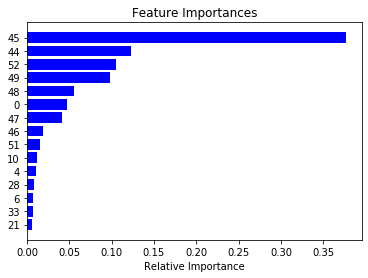

In [22]:
import matplotlib.pyplot as plt
features = full_df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [25]:
from sklearn.feature_selection import SelectFromModel
#feature = SelectFromModel(model)
sfm = SelectFromModel(model, threshold=1e-4, prefit=True)
Fit = sfm.transform(full_df)
print(full_df.shape)

(3140, 72)


In [27]:
'''
DIMENSIONALITY REDUCTION - BACKWARD FEATURE ELIMINATION
'''

# importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE



# create the object of the model
lreg = LinearRegression()


# specify the number of  features to select 
rfe = RFE(lreg, 50)

# fit the model
rfe = rfe.fit(X, y)

print('\n\nFEATUERS SELECTED\n\n')
print(rfe.support_)

print('\n\nRANKING OF FEATURES\n\n')
print(rfe.ranking_)



FEATUERS SELECTED


[False False  True  True  True  True  True False  True  True  True  True
  True  True  True False  True False  True  True  True  True  True  True
  True  True  True  True  True False False False False False False False
 False False False False  True  True  True False  True  True  True False
  True  True  True  True False False  True  True  True  True  True  True
 False  True False  True  True  True  True  True  True  True  True  True]


RANKING OF FEATURES


[22  5  1  1  1  1  1  6  1  1  1  1  1  1  1 11  1  2  1  1  1  1  1  1
  1  1  1  1  1 15 13 17 20 16 14 21 19 18 23  3  1  1  1  7  1  1  1  4
  1  1  1  1  8  9  1  1  1  1  1  1 10  1 12  1  1  1  1  1  1  1  1  1]


In [ ]:
#BoxPlot to assess the skewness of data


#fig1, ax1 = plt.subplots()
#ax1.set_title('Box plot of all columns')
#ax1.boxplot(full_df)

#plt.show()